# IRIS Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Iris

The Iris (aka. Fisher's) dataset is one of the most used referenced datasets due to its simplicity and understandibility.
It contains 150 records, separated into 3 different classes, where each class represents all measured individuals
of one specific type of iris plant. 

### Attributes

Each record has 5 attributes, where the first 4 are measurements of the plants features (sepal and petal length and width).
The last attribute is the class of the plant, therefor this dataset is with known categories. 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

## Data preparation

For this analysis Scikit-learn's iris dataset is used (`datasets.load_iris()`). 
This dataset separates the first 4 attributes (`iris["data"]`) from the last (`iris["target"]`).
These 2 sets are recombined to one single DataFrame to simplify plotting.

In [2]:
from IPython.display import display
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X = pd.DataFrame(iris['data'])
X.columns = iris.feature_names

y = pd.DataFrame(iris.target)
y['name'] = iris.target_names[y[0]]

X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


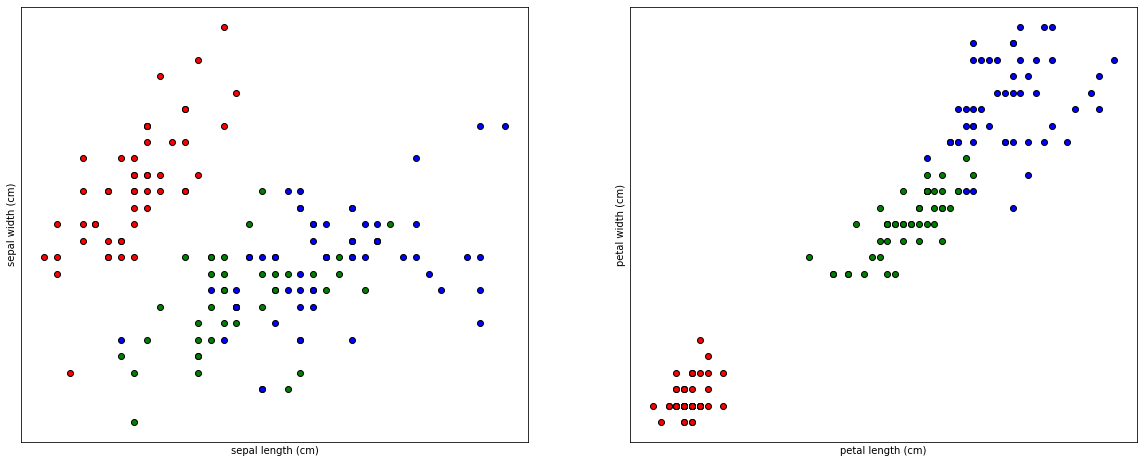

In [3]:
import matplotlib.pyplot as plt

def plot_scatter(X, ax, dim=('C1','C2')):
    colors = ['r', 'g', 'b']
    
    for i, target in enumerate(iris.target_names):
        ax.scatter(
            X[y[0] == i][dim[0]], 
            X[y[0] == i][dim[1]],  
            c=colors[i], cmap=plt.cm.Set1, label=target, edgecolor='k')
    
    ax.set_xticks(())
    ax.set_yticks(())

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes_names = [('sepal length (cm)', 'sepal width (cm)'),('petal length (cm)', 'petal width (cm)')]

for i in range(0,2):
    plot_scatter(X, axes[i], dim=axes_names[i])
    
    axes[i].set_xlabel(axes_names[i][0])
    axes[i].set_ylabel(axes_names[i][1])

plt.show()

## Normalization

First we normalize the dataset to avoid the influence of big absolute values on the result. 
Scikit-learn provides a `StandardScaler` to transform each feature value to its 
[Standard Score](https://en.wikipedia.org/wiki/Standard_score).  

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize dataset
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(X_std)
df_std.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## PCA - Principal Component Analysis

First a simple PCA is performed on the normalized data. This generates 2 Principal Components (PC or C) and places each point
relative to this PC. The result are 2 values for each data point where their combination represents the initial, 
4 dimensional point. The 4 dimensional space was therefor reduced to 2 dimensions which can now be plotted in a 
2D diagram. 

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(df_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Because the first 2 PCs are enought to describe ~96% of the samples variance it was decided to drop all but the fist 2 and use a 2D plot for visualization. To visualize the data the first 2 PCs are assigned to one axis each (X=>PC1, Y=>PC2) and plotted in a 2D scatter diagram.

As shown below the overall characteristics that could be assumed from the simple 2D diagrams above where preserved.
There is a well defined cluster for setosa, but versicolor and virginica are still hard to distinguish.

<Figure size 432x288 with 0 Axes>

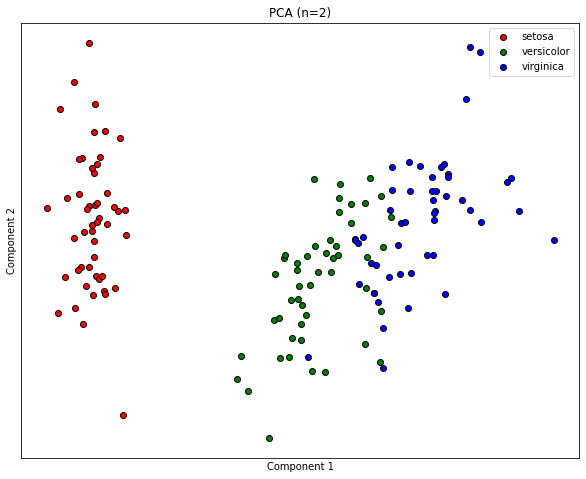

In [6]:
df_pca = pd.DataFrame(X_pca)
df_pca.drop([2,3], inplace=True, axis=1)
df_pca['target'] = y['name']
df_pca.columns = ['C1','C2','target']

plt.clf()
_, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('PCA (n=2)') 

plot_scatter(df_pca, ax)

plt.legend()
plt.show()

## mMDS - Metric Multidimensional Scaling

https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling
https://en.wikipedia.org/wiki/Multidimensional_scaling


In general, MDS is a technique used for analyzing similarity or dissimilarity data where the pairwise 'distances' of a source-set is mapped into an abstract Cartesian space. Main concept of MDS is to preseve the property of 'between-object' distance as well as possible. In mDNS this is achieved by using a "stress" function that describes the sum of differences between the source distance and the projected distance. Minimizing this "stress" organizes the values into a pattern that should be representative for the initial, higher dimensional structure.


In [7]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_std)
mds.stress_

235.65777193891677

The used scikit-learn MDS implementation returns raw stress which is no good indicator for how good a fit is (see https://github.com/scikit-learn/scikit-learn/pull/10168). It is therefor assumed that, accourding to the visual similariry to the PCA a 2 component fit is good enought. 

<Figure size 432x288 with 0 Axes>

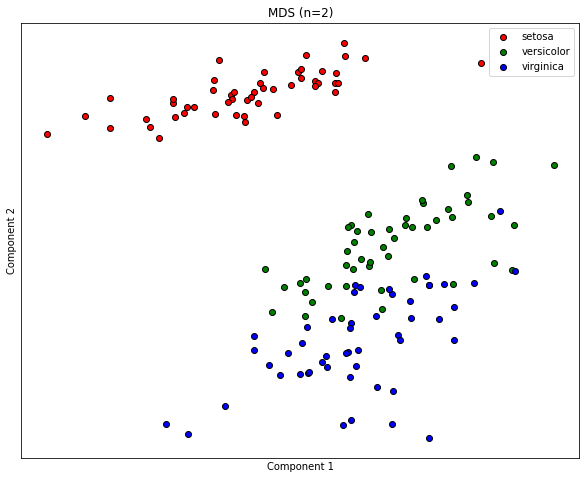

In [8]:
df_mds = pd.DataFrame(X_mds)
df_mds['target'] = y['name']
df_mds.columns = ['C1','C2','target']

plt.clf()
_, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('MDS (n=2)') 

plot_scatter(df_mds, ax)


plt.legend()
plt.show()

## t-SNE

https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne
https://medium.com/@layog/i-dont-understand-t-sne-part-1-50f507acd4f9

As the most embedding methods t-SNE (similar to MDS) uses a cost function to find a good representation of high-dimensional data in lower dimensional spaces. The used function is the Kullback–Leibler divergence (KL Divergence), which is minimzed to get a minimal divergence.


In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, n_iter=3000)
X_tsne = tsne.fit_transform(X_std)
[tsne.kl_divergence_, tsne.n_iter_]

[0.21242614090442657, 2049]

A perplexity of 20 and an maximum of 3000 iternations tend to show a constistent and well distiguished representation of the dataset. 

<Figure size 432x288 with 0 Axes>

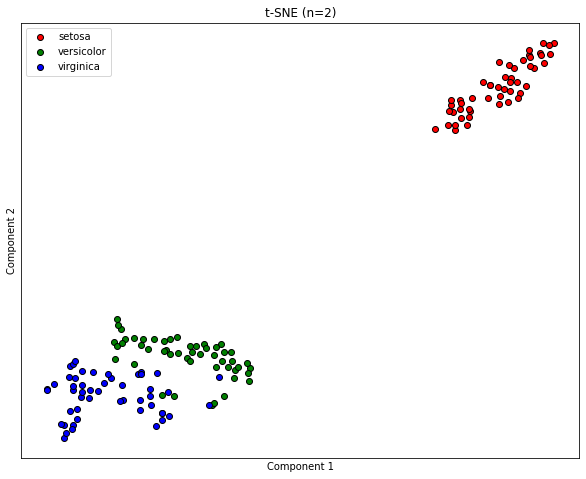

In [10]:
df_tsne = pd.DataFrame(X_tsne)

df_tsne['target'] = y['name']
df_tsne.columns = ['C1','C2','target']

plt.clf()
_, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('t-SNE (n=2)') 

plot_scatter(df_tsne, ax)

plt.legend()
plt.show()